In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
# From Stack Overflow
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

## Linear Regression

In [3]:
data_small = np.genfromtxt('linreg_small.csv', delimiter=',')
data_large = np.genfromtxt('linreg_large.csv', delimiter=',')

In [4]:
X_train_small = data_small[:,0]
Y_train_small = data_small[:,1]
X_train_large = data_large[:,0]
Y_train_large = data_large[:,1]

In [5]:
linreg_small = LinearRegression()
linreg_small.fit(X_train_small.reshape(-1,1), Y_train_small)
linreg_large = LinearRegression()
linreg_large.fit(X_train_large.reshape(-1,1), Y_train_large)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
X_train_small_p = np.append(X_train_small,0)
Y_train_small_p = np.append(Y_train_small,15)
X_train_large_p = np.append(X_train_large,0)
Y_train_large_p = np.append(Y_train_large,15)

In [7]:
linreg_small_p = LinearRegression()
linreg_small_p.fit(X_train_small_p.reshape(-1,1), Y_train_small_p)
linreg_large_p = LinearRegression()
linreg_large_p.fit(X_train_large_p.reshape(-1,1), Y_train_large_p)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

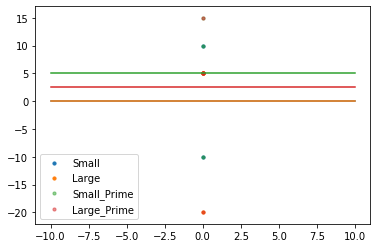

In [8]:
x_values = [-10,10]

#Small Dataset
plt.scatter(X_train_small, Y_train_small, s=10, label='Small')
y_values_small = [linreg_small.intercept_ + linreg_small.coef_ * x for x in x_values]
plt.plot(x_values, y_values_small)

#Large Dataset
plt.scatter(X_train_large, Y_train_large, s=10, label='Large')
y_values_large = [linreg_large.intercept_ + linreg_large.coef_ * x for x in x_values]
plt.plot(x_values, y_values_large)

## prime == new data point added

#Small Prime
plt.scatter(X_train_small_p, Y_train_small_p, s=10, label='Small_Prime', alpha=.5)
y_values_small_p = [linreg_small_p.intercept_ + linreg_small_p.coef_ * x for x in x_values]
plt.plot(x_values, y_values_small_p)

#Large Prime
plt.scatter(X_train_large_p, Y_train_large_p, s=10, label='Large_Prime', alpha=.5)
y_values_large_p = [linreg_large_p.intercept_ + linreg_large_p.coef_ * x for x in x_values]
plt.plot(x_values, y_values_large_p)

plt.legend()
plt.show()

## Logistic Regression

#### Can't really make sense of log reg... need a refresher I think

In [12]:
data_small = np.genfromtxt('logreg_small.csv', delimiter=',')
data_large = np.genfromtxt('logreg_large.csv', delimiter=',')
data_small_p = np.genfromtxt('logreg_small_p.csv', delimiter=',')
data_large_p = np.genfromtxt('logreg_large_p.csv', delimiter=',')

In [13]:
X_train_small = data_small[:,:2]
Y_train_small = data_small[:,2]
X_train_large = data_large[:,:2]
Y_train_large = data_large[:,2]
X_train_small_p = data_small_p[:,:2]
Y_train_small_p = data_small_p[:,2]
X_train_large_p = data_large_p[:,:2]
Y_train_large_p = data_large_p[:,2]

[[0.         1.25127353]]
[0.]
[[0.         2.33867431]]
[0.]
[[0.         1.24207959]]
[0.02789063]
[[0.         2.29130527]]
[0.31856902]


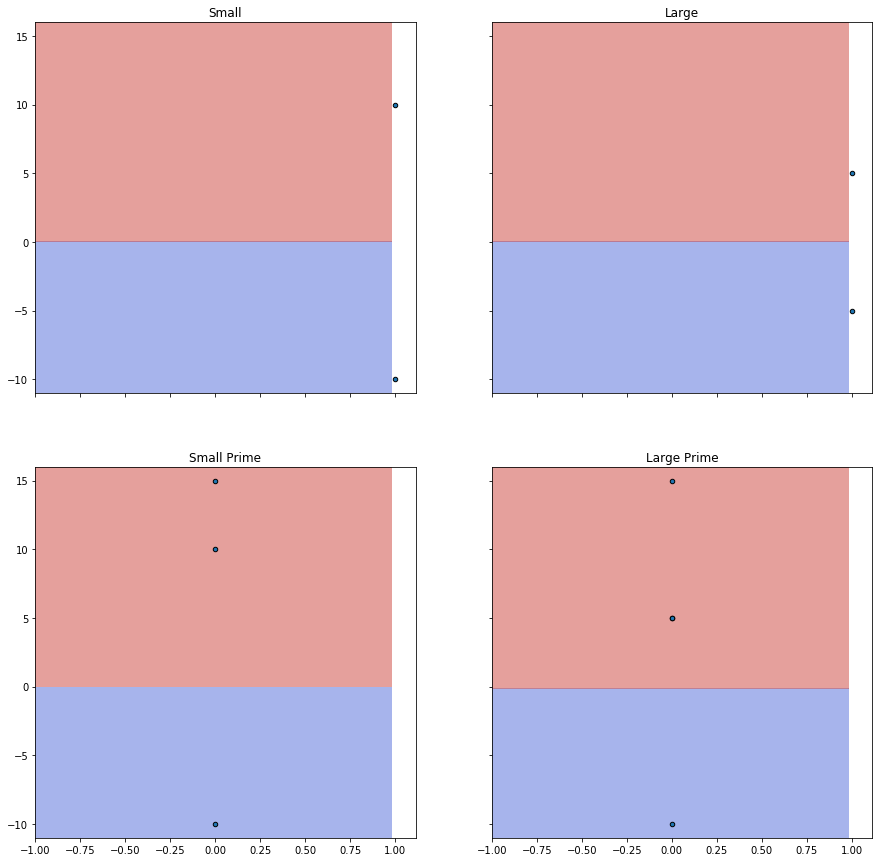

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,15))

X0, X1 = X_train_large_p[:, 0], X_train_large_p[:, 1]
xx, yy = make_meshgrid(X0, X1)

model = LogisticRegression(penalty='none', solver='lbfgs', fit_intercept=True)

logreg_small = model.fit(X_train_small, Y_train_small)
plot_contours(ax1[0], logreg_small, xx, yy, cmap=plt.cm.coolwarm, alpha=.5)
ax1[0].scatter(X_train_small[:,0], X_train_small[:,1], cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Small')
ax1[0].set_title('Small')
print(logreg_small.coef_)
print(logreg_small.intercept_)

logreg_large = model.fit(X_train_large, Y_train_large)
plot_contours(ax1[1], logreg_large, xx, yy, cmap=plt.cm.coolwarm, alpha=.5)
ax1[1].scatter(X_train_large[:,0], X_train_large[:,1], cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Large')
ax1[1].set_title('Large')
print(logreg_large.coef_)
print(logreg_large.intercept_)

logreg_small_p = model.fit(X_train_small_p, Y_train_small_p)
plot_contours(ax2[0], logreg_small_p, xx, yy, cmap=plt.cm.coolwarm, alpha=.5)
ax2[0].scatter(X_train_small_p[:,0], X_train_small_p[:,1], cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Small_P')
ax2[0].set_title('Small Prime')
print(logreg_small_p.coef_)
print(logreg_small_p.intercept_)

logreg_large_p = model.fit(X_train_large_p, Y_train_large_p)
plot_contours(ax2[1], logreg_large_p, xx, yy, cmap=plt.cm.coolwarm, alpha=.5)
ax2[1].scatter(X_train_large_p[:,0], X_train_large_p[:,1], cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Large_P')
ax2[1].set_title('Large Prime')
print(logreg_large_p.coef_)
print(logreg_large_p.intercept_)

## SVM

In [14]:
data_small = np.genfromtxt('svm_small.csv', delimiter=',')
data_large = np.genfromtxt('svm_large.csv', delimiter=',')
data_small_p = np.genfromtxt('svm_small_p.csv', delimiter=',')
data_large_p = np.genfromtxt('svm_large_p.csv', delimiter=',')

In [15]:
X_train_small = data_small[:,:2]
Y_train_small = data_small[:,2]
X_train_large = data_large[:,:2]
Y_train_large = data_large[:,2]
X_train_small_p = data_small_p[:,:2]
Y_train_small_p = data_small_p[:,2]
X_train_large_p = data_large_p[:,:2]
Y_train_large_p = data_large_p[:,2]

Text(0.5, 1.0, 'Large Prime')

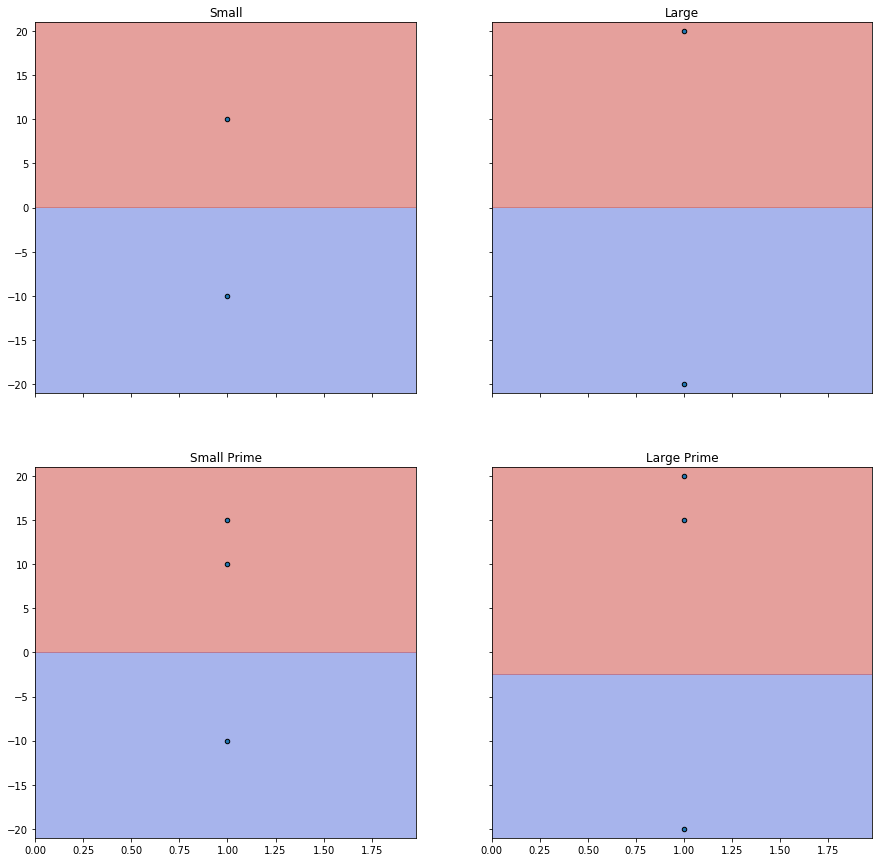

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,15))

X0, X1 = X_train_large[:, 0], X_train_large[:, 1]
xx, yy = make_meshgrid(X0, X1)

model = SVC(kernel='linear')

svm_small = model.fit(X_train_small, Y_train_small)
plot_contours(ax1[0], svm_small, xx, yy, cmap=plt.cm.coolwarm, alpha=.5)
ax1[0].scatter(X_train_small[:,0], X_train_small[:,1], cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Small')
ax1[0].set_title('Small')

svm_large = model.fit(X_train_large, Y_train_large)
plot_contours(ax1[1], svm_large, xx, yy, cmap=plt.cm.coolwarm, alpha=.5)
ax1[1].scatter(X_train_large[:,0], X_train_large[:,1], cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Large')
ax1[1].set_title('Large')

svm_small_p = model.fit(X_train_small_p, Y_train_small_p)
plot_contours(ax2[0], svm_small_p, xx, yy, cmap=plt.cm.coolwarm, alpha=.5)
ax2[0].scatter(X_train_small_p[:,0], X_train_small_p[:,1], cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Small_P')
ax2[0].set_title('Small Prime')

svm_large_p = model.fit(X_train_large_p, Y_train_large_p)
plot_contours(ax2[1], svm_large_p, xx, yy, cmap=plt.cm.coolwarm, alpha=.5)
ax2[1].scatter(X_train_large_p[:,0], X_train_large_p[:,1], cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Large_P')
ax2[1].set_title('Large Prime')


## Perceptron

In [23]:
data_small = np.genfromtxt('svm_small.csv', delimiter=',')

In [24]:
X_train_small = data_small[:,:2]
Y_train_small = data_small[:,2]

In [25]:
ptm = Perceptron()
ptm.fit(X_train_small, Y_train_small)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

Text(0.5, 1.0, 'Small')

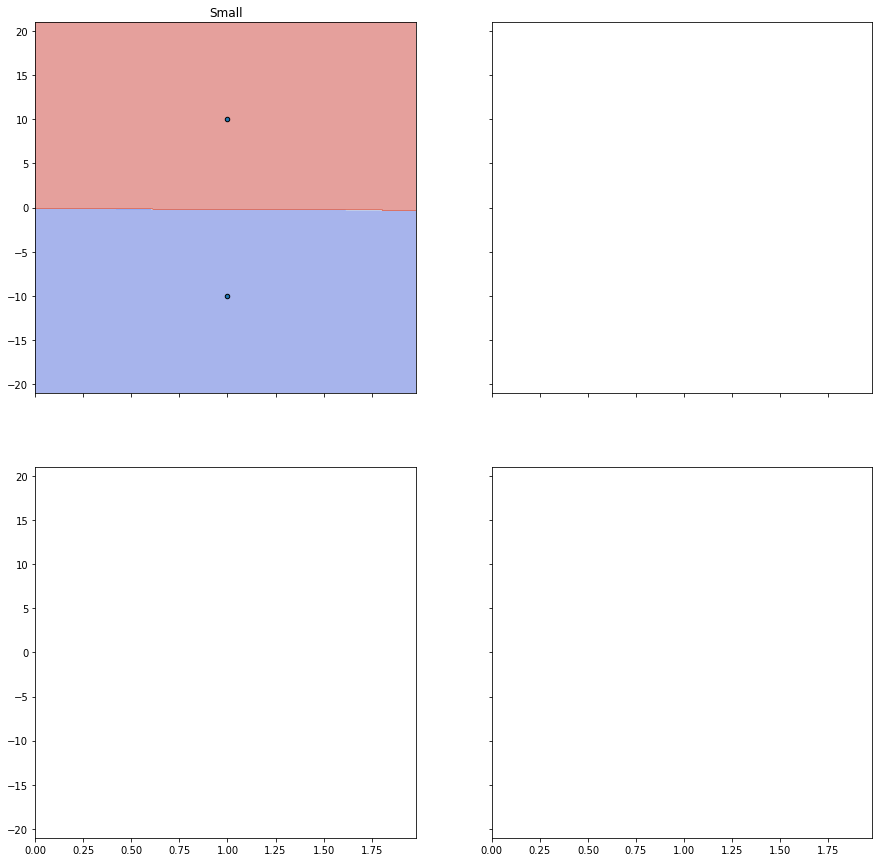

In [27]:
fig, (ax1, ax2) = plt.subplots(2,2, sharex=True, sharey=True, figsize=(15,15))
plot_contours(ax1[0], ptm, xx, yy, cmap=plt.cm.coolwarm, alpha=.5)
ax1[0].scatter(X_train_small[:,0], X_train_small[:,1], cmap=plt.cm.coolwarm, s=20, edgecolors='k', label='Small')
ax1[0].set_title('Small')

## Decision Trees (needs some thinking about dataset)

In [ ]:
data_small = np.genfromtxt('dt_small.csv', delimiter=',')
data_large = np.genfromtxt('dt_large.csv', delimiter=',')
data_small_p = np.genfromtxt('dt_small_p.csv', delimiter=',')
data_large_p = np.genfromtxt('dt_large_p.csv', delimiter=',')

## Misc

In [18]:
data_small = pd.read_csv('dataset_small.csv')
data_large = pd.read_csv('dataset_large.csv')

X_train_small = data_small.loc[:,['Feature 1', 'Feature 2']]
Y_train_small = data_small.loc[:,['Potato']]
Y_train_small = Y_train_small.values.reshape(X_train_small.shape[0],)
X_train_large = data_large.loc[:,['Feature 1', 'Feature 2']]
Y_train_large = data_large.loc[:,['Potato']]
Y_train_large = Y_train_large.values.reshape(X_train_large.shape[0],)

logreg_small = LogisticRegression(penalty='none',solver='lbfgs', fit_intercept=True)
logreg_small.fit(X_train_small, Y_train_small)
logreg_large = LogisticRegression(penalty='none',solver='lbfgs', fit_intercept=True)
logreg_large.fit(X_train_large, Y_train_large)

not_potato_small = X_train_small.loc[~data_small['Potato']]
potato_small = X_train_small.loc[data_small['Potato']]
not_potato_large = X_train_large.loc[~data_large['Potato']]
potato_large = X_train_large.loc[data_large['Potato']]

np.arange(-1.0,3.0,.1)

plt.scatter(not_potato_small.iloc[:,0], not_potato_small.iloc[:,1], s=10, label='Not potato small')
plt.scatter(potato_small.iloc[:,0], potato_small.iloc[:,1], s=10, label='Potato small')
parameters_small = logreg_small.intercept_.tolist()
parameters_small.extend(logreg_small.coef_[0])
x_values_small = [-10,10]
y_values_small = - (parameters_small[0] + np.dot(parameters_small[1], x_values_small)) / parameters_small[2]
plt.plot(x_values_small, y_values_small, label='Decision Boundary small')

plt.scatter(not_potato_large.iloc[:,0], not_potato_large.iloc[:,1], s=10, label='Not Potato large')
plt.scatter(potato_large.iloc[:,0], potato_large.iloc[:,1], s=10, label='Potato large')
parameters_large = logreg_large.intercept_.tolist()
parameters_large.extend(logreg_large.coef_[0])
x_values_large = [-20,20]
#x_values = np.arange(-5.0,7.0,.1)
y_values_large = - (parameters_large[0] + np.dot(parameters_large[1], x_values_large)) / parameters_large[2]
plt.plot(x_values_large, y_values_large, label='Decision Boundary large')


plt.legend()
plt.show()

parameters_small

parameters_large


FileNotFoundError: [Errno 2] File b'dataset_small.csv' does not exist: b'dataset_small.csv'